In [18]:
import nibabel as nib
from dipy.viz import regtools
import numpy as np
import cv2
import matplotlib.pyplot as plt
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

In [20]:
img_in = nib.load('e:/affine_operate/t1w_seg_pve_0_nores.nii.gz')
img_ref = nib.load('e:/affine_operate/nodif_B0.nii.gz')
img_out = nib.load('e:/affine_operate/t1w_csf_mask_dwi.nii.gz')
init = np.loadtxt('e:/affine_operate/t1wtissue2dwi_xfm.mat')

[[ 1.01030130e+00  5.32921542e-02  1.87642153e-03  3.90175170e+01]
 [-5.32649674e-02  1.01022677e+00 -1.25259237e-02  9.39017734e+00]
 [-2.53348422e-03  1.24097244e-02  1.01162836e+00 -7.46153728e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
<class 'dipy.align.imaffine.AffineMap'>
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
(96, 128, 128)
(96, 128, 128)
(96, 128, 128)
(141, 141, 68)


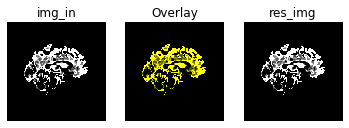

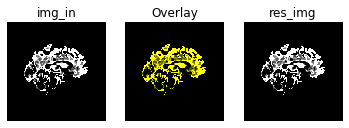

In [36]:
img_in_arr = img_in.get_data()
img_ref_arr = img_ref.get_data()
pts = img_ref.shape
# print(pts)
# res = cv2.warpAffine(img_in_arr, init, pts)
print(init)
identity = np.eye(4)
affine_map = AffineMap(identity,
                       img_in_arr.shape, img_in.affine,
                       img_in_arr.shape, img_in.affine)
print(type(affine_map))

print(affine_map)
print(img_in_arr.shape)
res_img = affine_map.transform(img_in_arr)
print(img_in_arr.shape)
print(res_img.shape)
print(img_ref_arr.shape)
regtools.overlay_slices(img_in_arr, res_img, None, 0,
                        "img_in", "res_img")